<a href="https://colab.research.google.com/github/shivansh9770/Netflix-Movies-and-TV-show-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

### **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### **Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing csv file**

In [ ]:
netflix_df = pd.read_csv('/content/drive/MyDrive/Netflix Movies and TV Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### **Exploring Data**

In [ ]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


We will remove show_id,date added, duration and title probably

In [ ]:
#evaluate no of rows and columns
print('NO of rows = '+ str(netflix_df.shape[0]))
print('NO of columns = '+ str(netflix_df.shape[1]))

NO of rows = 7787
NO of columns = 12


In [ ]:
#To show No. of total values(elements) in the dataset
netflix_df.size

93444

In [ ]:
#TO show the column name
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#TO show the data type of each columns
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#To show the datasets information like indexs,columns,data type etc.
netflix_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
#checking nan values
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#finding the duplicates in netflix_df
netflix_df.duplicated().sum()

0

As we can see above there is no duplicates in the dataset.


In [ ]:
#describing data
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [ ]:
#Looking for number of unique values in our dataset
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [ ]:
netflix_df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

Text(0.5, 1.0, 'Type of the Show on Netflix')

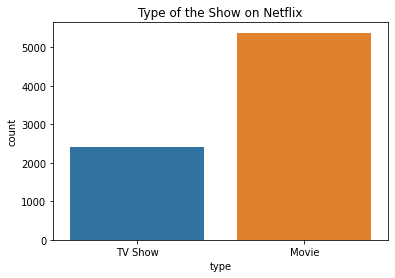

In [ ]:
sns.countplot(x='type', data=netflix_df)
plt.title("Type of the Show on Netflix")

In [ ]:
netflix_df['title'].value_counts()

3%                                          1
Results                                     1
Rich in Love                                1
Ricardo Quevedo: Los amargados somos más    1
Ricardo Quevedo: Hay gente así              1
                                           ..
Hamza's Suitcase                            1
Hamid                                       1
Hamburger Hill                              1
Hamara Dil Aapke Paas Hai                   1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     1
Name: title, Length: 7787, dtype: int64

In [ ]:
netflix_df['listed_in'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

In [ ]:
netflix_df['listed_in'].unique()

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Documentaries, International Movies, Sports Movies',
       'Independent Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers',
       'International TV Shows, TV Dramas',
       'Comedies, Dramas, Independent Movies', 'Sports Movies',
       'Dramas, Independent Movies, International Movies',
       'Action & Adventure, Dramas, International Movies',
       'Anime Series, International TV Shows', 'Documentaries',
       'Reality TV', 'Documentaries, International

In [ ]:
netflix_df['cast'].unique()

array(['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi',
       'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato',
       'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim',
       ...,
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy',
       'Nasty C', 'Adriano Zumbo, Rachel Khoo'], dtype=object)

In [ ]:
netflix_df['director'].value_counts().reset_index()

,index,director
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,16
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Youssef Chahine,12
...,...,...
4044,Vibhu Virender Puri,1
4045,Lucien Jean-Baptiste,1
4046,Jason Krawczyk,1
4047,Quinn Lasher,1


 Make a copy of datasets

In [ ]:
df = netflix_df.copy()

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

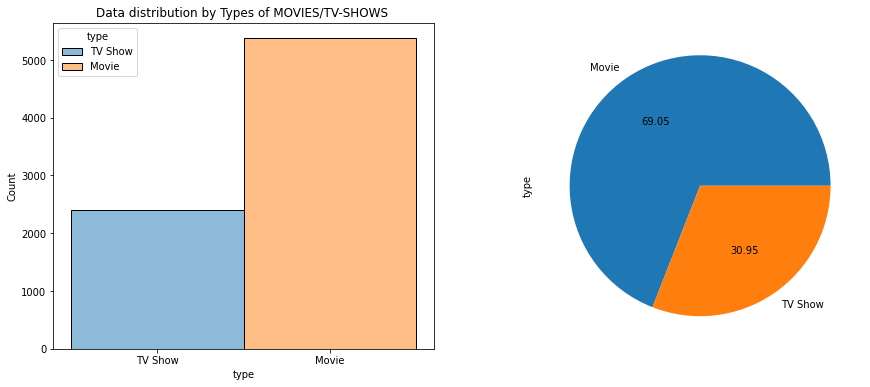

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,6))
#This graph represtent the distribution of Types of shows in Netflix
sns.histplot(x="type",ax=axs[0],hue='type', data=df).set(title='Data distribution by Types of MOVIES/TV-SHOWS ')
#This graph represtent the Percentage of types of shows in netflix
df['type'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

In [ ]:
netflix_df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [ ]:
netflix_df.groupby(['type'])['rating'].value_counts()

type     rating  
Movie    TV-MA       1845
         TV-14       1272
         R            663
         TV-PG        505
         PG-13        386
         PG           247
         TV-Y         117
         TV-G         111
         TV-Y7         95
         NR            79
         G             39
         TV-Y7-FV       5
         UR             5
         NC-17          3
TV Show  TV-MA       1018
         TV-14        659
         TV-PG        301
         TV-Y7        176
         TV-Y         163
         TV-G          83
         NR             5
         R              2
         TV-Y7-FV       1
Name: rating, dtype: int64

In [ ]:
#Rating of Tv shows and Movies
netflix_df.groupby(['rating'])['type'].value_counts()

rating    type   
G         Movie        39
NC-17     Movie         3
NR        Movie        79
          TV Show       5
PG        Movie       247
PG-13     Movie       386
R         Movie       663
          TV Show       2
TV-14     Movie      1272
          TV Show     659
TV-G      Movie       111
          TV Show      83
TV-MA     Movie      1845
          TV Show    1018
TV-PG     Movie       505
          TV Show     301
TV-Y      TV Show     163
          Movie       117
TV-Y7     TV Show     176
          Movie        95
TV-Y7-FV  Movie         5
          TV Show       1
UR        Movie         5
Name: type, dtype: int64

In [ ]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


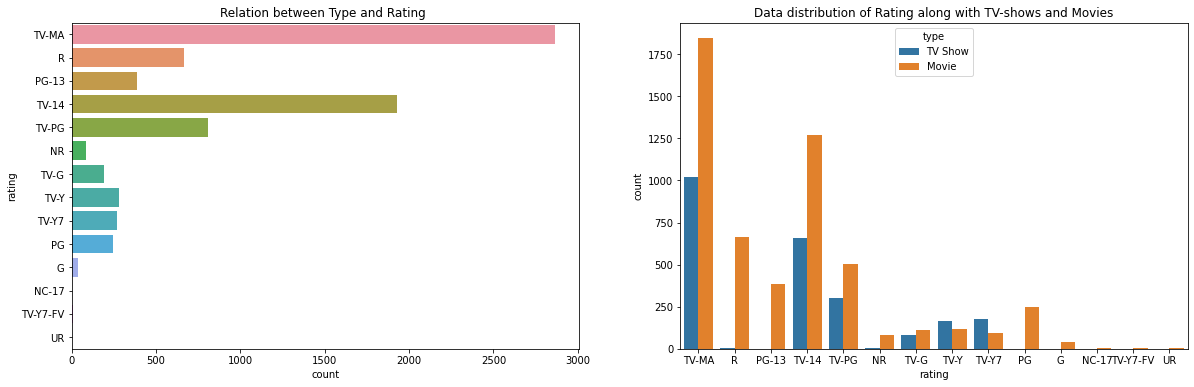

In [ ]:
#figured some graphs
fig,axs = plt.subplots(1,2 ,figsize=(20,6))
# This graph represent Relationship between Type and Rating  
sns.countplot(y="rating",ax=axs[0], data=df).set(title='Relation between Type and Rating ')
#This graph represents the distribution of Rating as well as the number of TV-show and Movies
sns.countplot(x="rating", hue="type",ax=axs[1], data=df).set(title='Data distribution of Rating along with TV-shows and Movies')

plt.show()

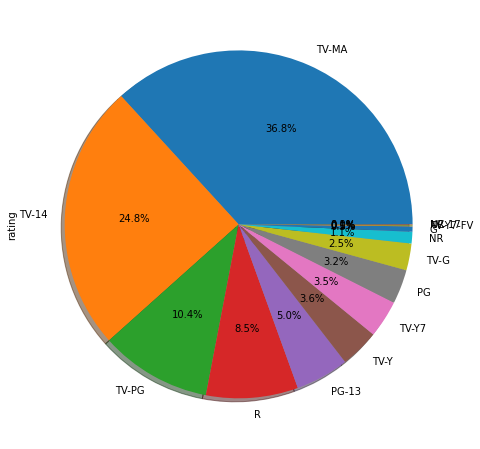

In [ ]:
#To show the rating percentage 
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(15,8))

plt.show()

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

##Ratings : Netflix rating is based on MPAA (Motion Picture Association of America) Ratings System and The TV Parental Guidelines ratings provides program ratings, and content ratings to provide a clearer idea of the reason for a program’s rating.

* **G** – General Audience(all ages admitted).
* **PG** – Parental Guidance Suggested ( some material may not be suitable for children).
*  **PG-13** – Parents Strongly Cautioned (some material may be inappropriated for children under 13).
* **R** – Restricted (Under 17 requires Accompanying parent or adult guardians).
* **NC-17** – No Children 17 or Under (no one 17 or under admitted),
* **TV-Y** – This program is designed to be appropriate for all children.
* **TV-Y7** – This program is designed for children age 7 and above.
* **TV-G** – General Audience
* **NR**  - NOt rated
* **TV-PG** – Parental Guidance Suggested or This program contains material that parents may find unsuitable for younger children.
* **TV-14** – Parents Strongly Cautioned or This program contains some material that many parents would find unsuitable for children under 14 years of age.
* **TV-MA** – TV Mature Audience Only or This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.
* **TV-Y7-FV** - Fantasy violence (exclusive to the TV-Y7 rating)
* **UR** -  unrated.





In [ ]:
#check the missing values percentage
missing_values_percentage = df.isna().mean()*100
print(missing_values_percentage)

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


In [ ]:
#This library is for showing the graph of missing value
import missingno as msno

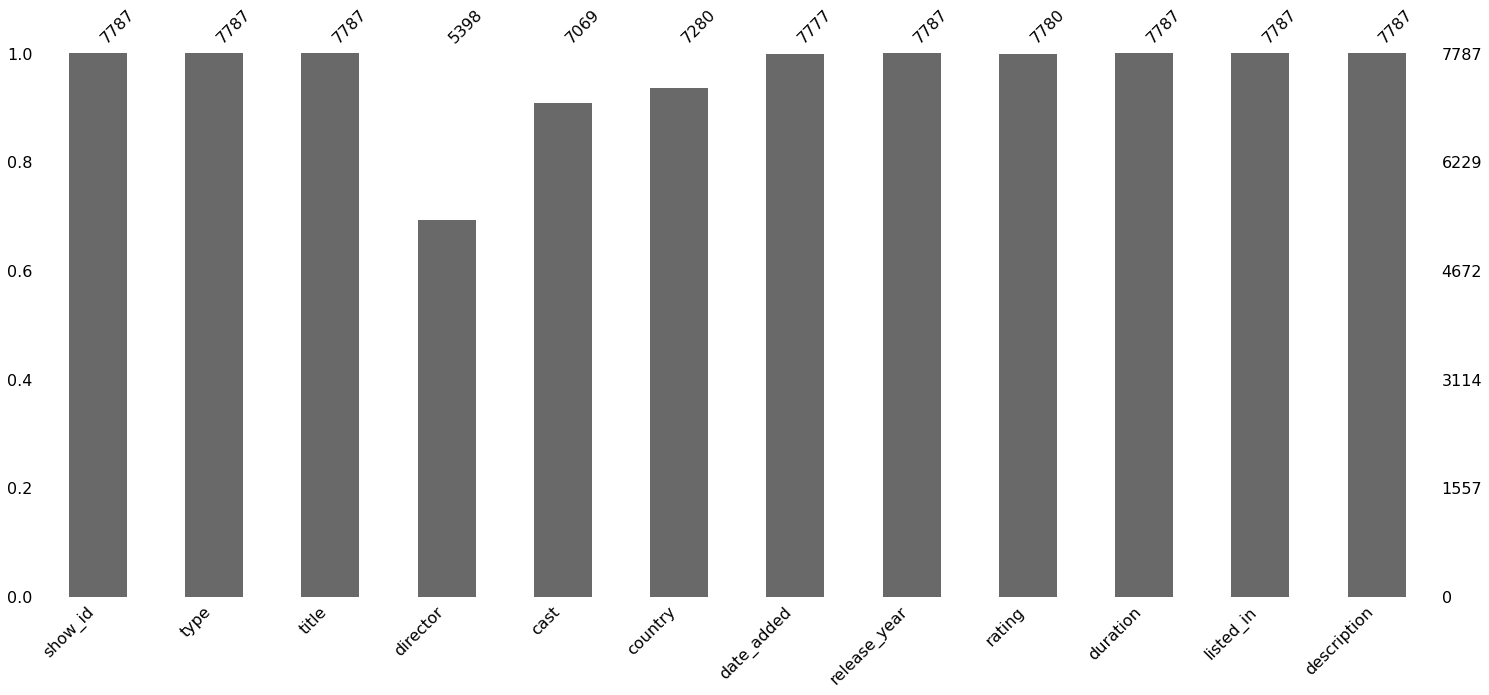

In [ ]:
#this graph shows this which columns has missing values
msno.bar(df)

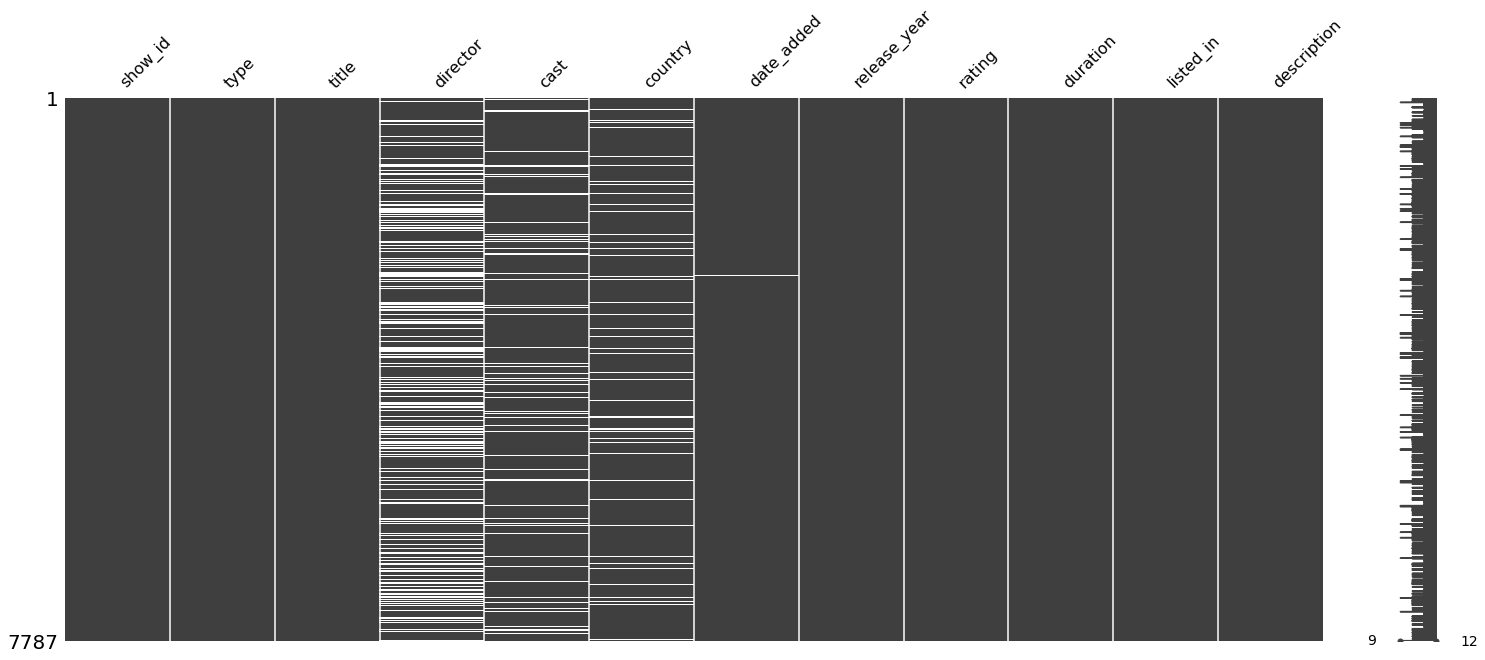

In [ ]:
#this graph show the nan values in columns
msno.matrix(df)

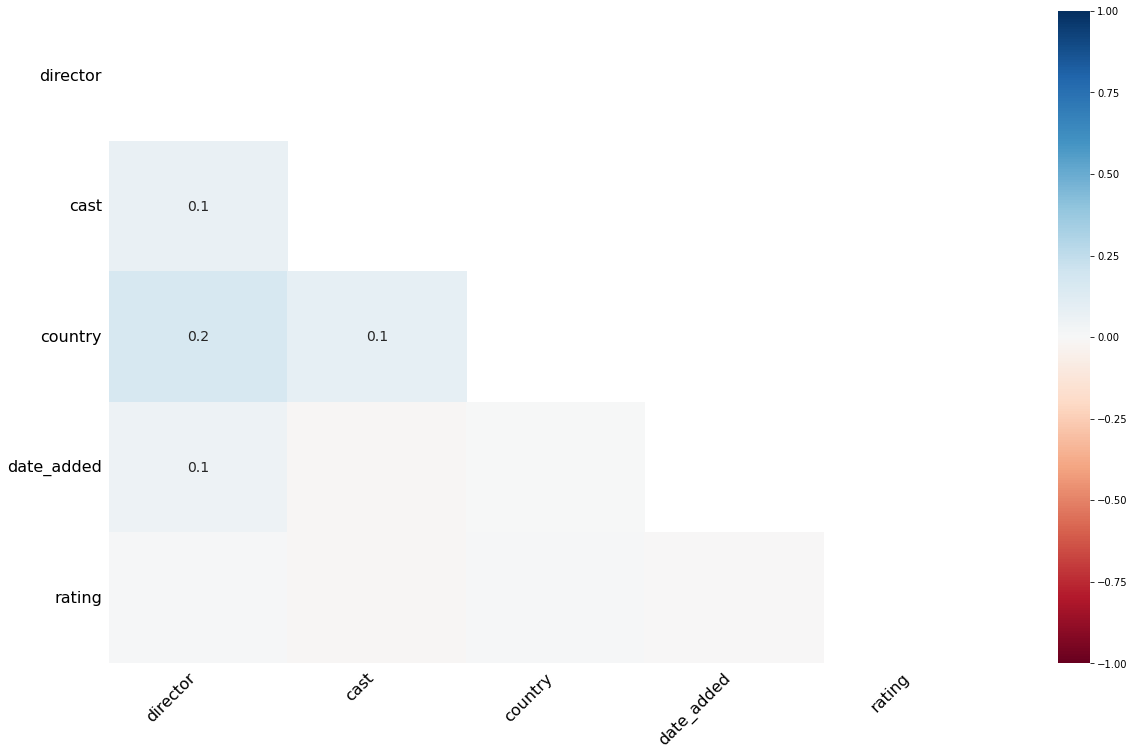

In [ ]:
#this heatmap show the correlation between nan values columns
msno.heatmap(df)

In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


Converting date_added to datetime formate and create new features to store date,day ,month and year

In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

##Null values Treatment

In [ ]:
#To seen nan values in date_added columns
df[df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [ ]:
#Remove nan values in date_added
df.dropna(subset=['date_added'],inplace=True)

In [ ]:
#TO seen nan values in rating column
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
#Remove nan vlaues in rating 
df.dropna(subset=['rating'],inplace=True)

##Remove nan values 

In [ ]:
#Remove nan values in director,cast and counrty
df.dropna(subset=['director'],inplace=True)

In [ ]:
#check nan values
df.isna().sum()

show_id           0
type              0
title             0
director          0
cast            419
country         205
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [ ]:
# Creating a new features to store date, day, month and year seperately.
df['date'] = pd.to_datetime(df['date_added'],errors='coerce')
df['date_day'] = df['date'].dt.day.astype(int)
df['date_month'] = df['date'].dt.month.astype(int)
df['date_year'] = df['date'].dt.year.astype(int)

In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,date_day,date_month,date_year
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,23,12,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,20,12,2018


In [ ]:
#Check unique value in release_year column
df['release_year'].unique()

array([2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015, 2020,
       2010, 2005, 2012, 2006, 2013, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       1973, 1967, 1960, 1981, 1958, 1976, 2021, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1942, 1969, 1955, 1963, 1964,
       1954, 1970, 1944, 1947, 1959, 1943])

In [ ]:
#check total number of tv shows and movies year wise 
df['release_year'].value_counts().reset_index().head()

,index,release_year
0,2017,749
1,2018,728
2,2016,637
3,2019,578
4,2020,441


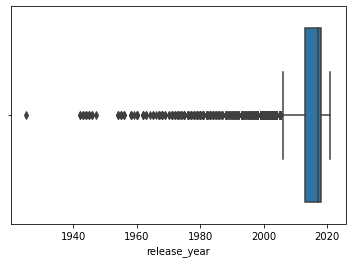

In [ ]:
sns.boxplot(netflix_df.release_year)

As we can see from above boxplot, before 2014 the production growth for Movies & Tv Shows were very less ,that's why it's showing those values as outliers.

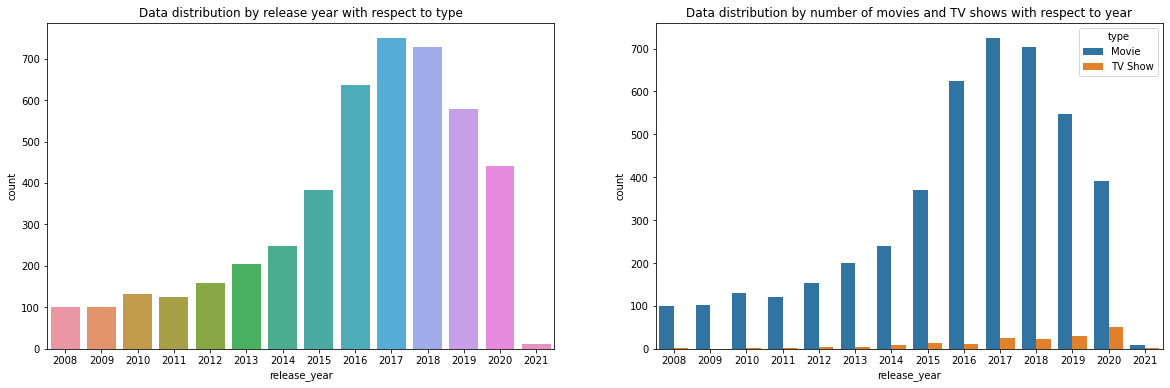

In [ ]:

df1 = df[(df['release_year']>=2008)]
#figured some graphs
fig,axs = plt.subplots(1,2 ,figsize=(20,6))
# This graph represent the number of movies anb tv shows released in after 2008
sns.countplot(x="release_year",ax=axs[0], data=df1).set(title='Data distribution by release year with respect to type')
# This graph represent the distribution of movies and tv shows released in after 2008  
sns.countplot(x="release_year",hue='type',ax=axs[1], data=df1).set(title='Data distribution by number of movies and TV shows with respect to year')
plt.show()
#ax = sns.countplot(x="release_year", hue="type", data=df1).set(title='Data distribution of release_year wise type of tv show and movies')

In [ ]:
#check the unique values
df['country'].unique()

array(['Mexico', 'Singapore', 'United States', 'Turkey', 'Egypt', 'India',
       'Thailand', 'Nigeria', 'Norway, Iceland, United States',
       'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania', 'Spain',
       'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'United Kingdom', 'South Africa, China, United States',
       'Argentina', 'United States, France, Serbia', nan, 'Germany',
       'Denmark, France, Poland', 'Poland', 'Japan', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Mexico, United States', 'United States, China',
       'China, Hong Kong', 'United States, United Kingdom', 'Taiwan',
       'France, South Korea, Japan', 'United States, Canada',
       'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada, United States',
       'Denmark', 'Hong Kong', 'France, Netherlands, Singa

In [ ]:
#check value counts of country
df['country'].value_counts().reset_index().head(10)

,index,country
0,United States,1835
1,India,848
2,United Kingdom,201
3,Canada,115
4,Spain,97
5,Egypt,87
6,Japan,78
7,Turkey,76
8,France,73
9,Philippines,70


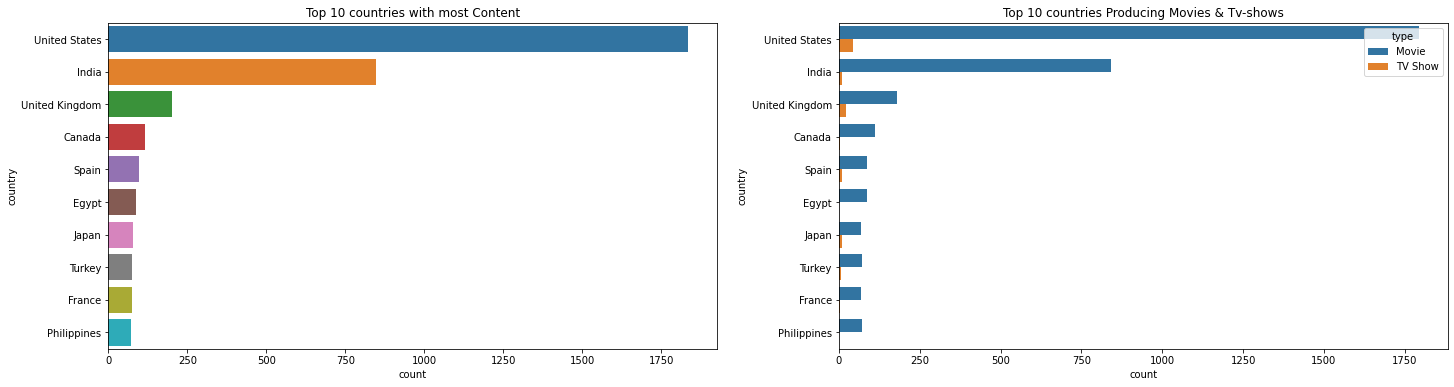

In [ ]:
#Figuring some graph
fig,axs=plt.subplots(1,2,figsize=(24,6))
#Analysing top 10 countries with most content 
sns.countplot(data=df,y='country',ax=axs[0],order=df['country'].value_counts().index[0:10]).set(title='Top 10 countries with most Content')
#This graph represent the Top 10 countries contents with Movies and tv-shows
sns.countplot(data=df,y='country',ax=axs[1],order=df['country'].value_counts().index[0:10],hue='type').set(title='Top 10 countries Producing Movies & Tv-shows')
plt.show()

In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,date_day,date_month,date_year
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,23,12,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,20,12,2018


In [ ]:
#top 10 director
df['director'].value_counts().reset_index().head()

,index,director
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,16
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Jay Chapman,12


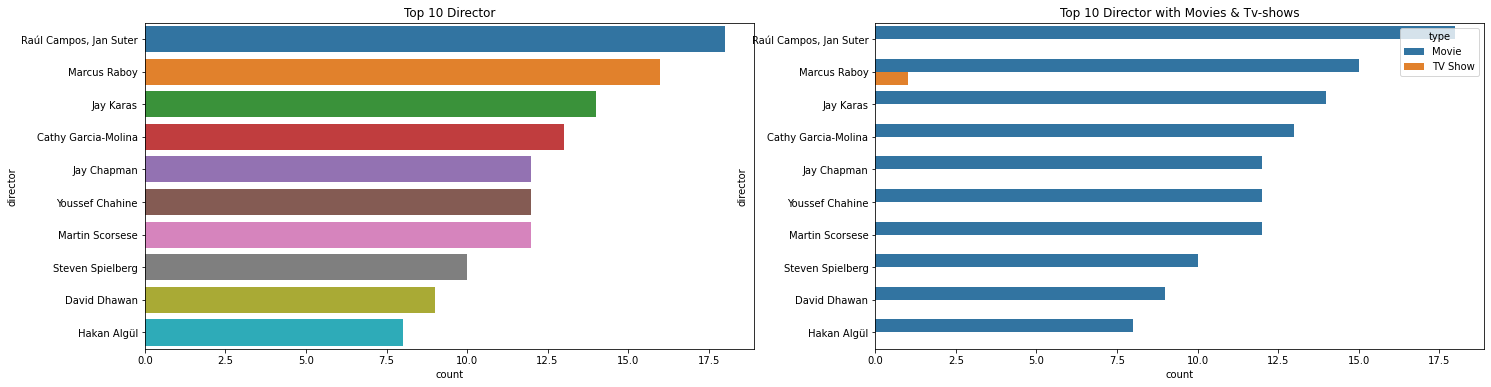

In [ ]:
#Figuring some graph
fig,axs=plt.subplots(1,2,figsize=(24,6))
#Analysing top 10 Director
sns.countplot(data=df,y='director',ax=axs[0],order=df['director'].value_counts().index[0:10]).set(title='Top 10 Director')
#This graph represent the Top 10 director with Movies and tv-shows
sns.countplot(data=df,y='director',ax=axs[1],order=df['director'].value_counts().index[0:10],hue='type').set(title='Top 10 Director with Movies & Tv-shows')
plt.show()

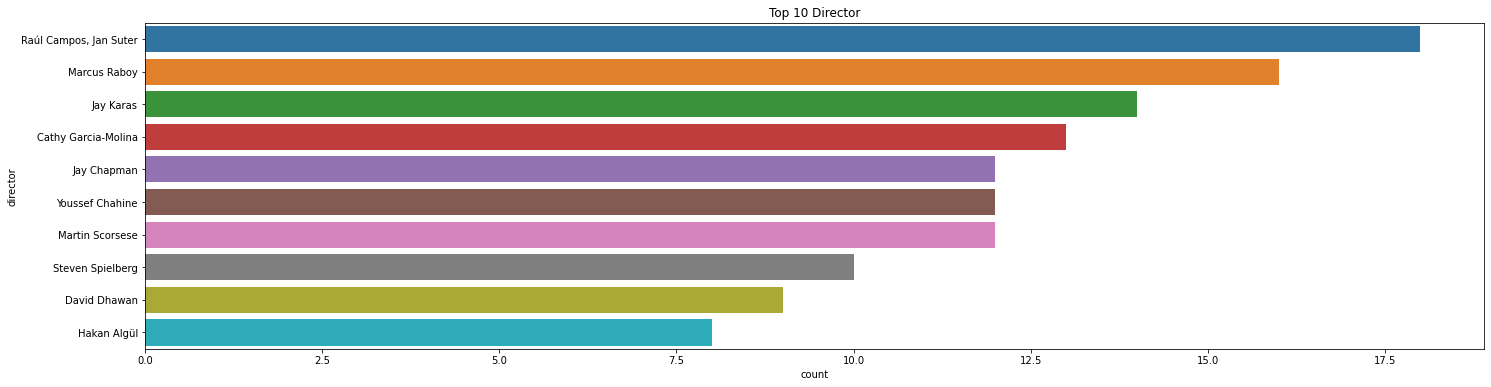

In [ ]:
plt.figure(figsize=(24,6))
sns.countplot(y='director',data=df,order=df['director'].value_counts().index[0:10]).set(title='Top 10 Director')
plt.show()

In [ ]:
#top actor 0 to 8
df['cast'].value_counts().reset_index().head()

,index,cast
0,Samuel West,10
1,Jeff Dunham,7
2,Kevin Hart,6
3,Bill Burr,5
4,Jim Gaffigan,5


In [ ]:
df['title'].value_counts().reset_index()

,index,title
0,7:19,1
1,Retablo,1
2,Revolting Rhymes,1
3,Revolt,1
4,Revenger,1
...,...,...
5389,Guru,1
5390,Gurgaon,1
5391,Gunjan Saxena: The Kargil Girl,1
5392,Guna 369,1


In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,date_day,date_month,date_year
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,23,12,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,20,12,2018


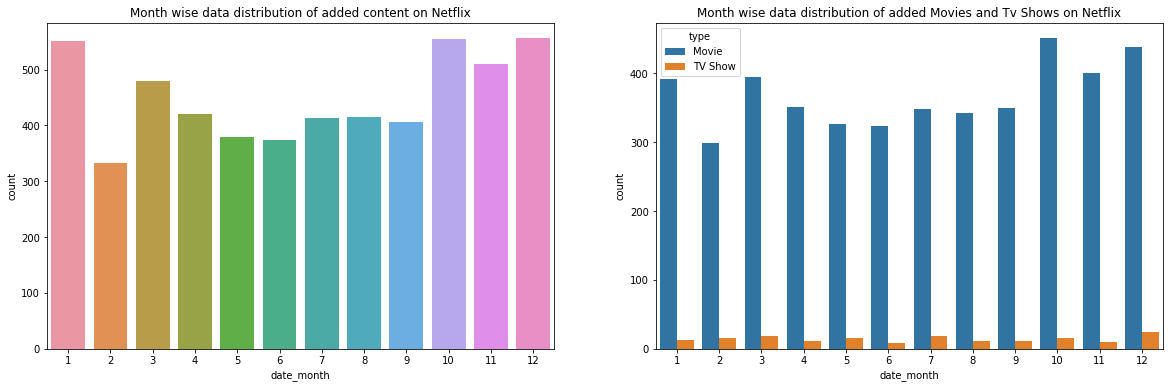

In [ ]:
#figured some graphs
fig,axs = plt.subplots(1,2 ,figsize=(20,6))
# This graph represent the number Content added on netflix month wise
sns.countplot(x="date_month",ax=axs[0], data=df).set(title='Month wise data distribution of added content on Netflix')
# This graph represent the Monthly data distribution of added Movies and Tv shows on Netflix  
sns.countplot(x="date_month",hue='type',ax=axs[1], data=df1).set(title='Month wise data distribution of added Movies and Tv Shows on Netflix')
plt.show()

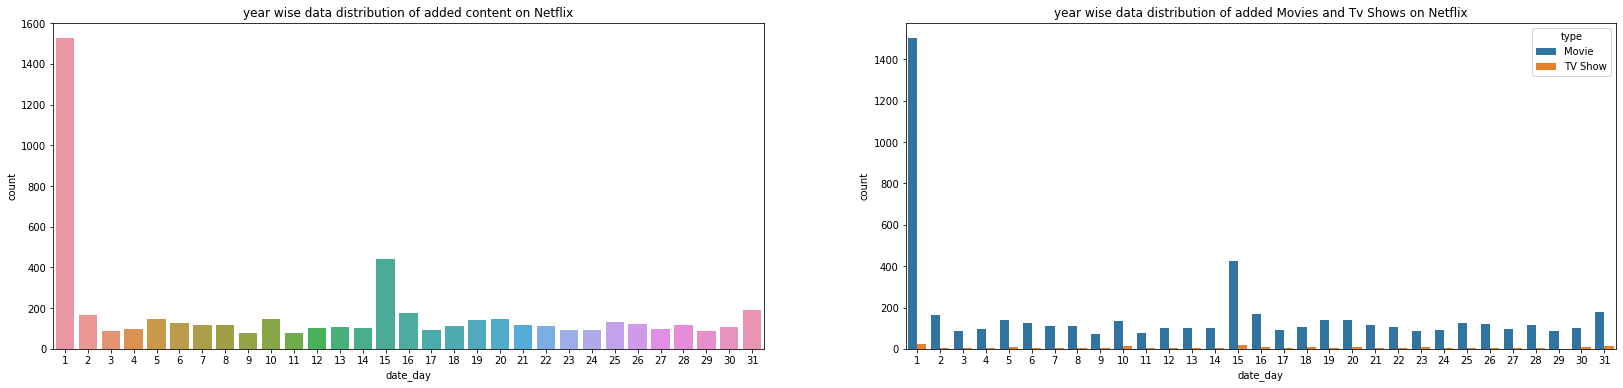

In [ ]:
#figured some graphs
fig,axs = plt.subplots(1,2 ,figsize=(28,6))
# This graph represent the year wise number of Content added on netflix 
sns.countplot(x="date_day",ax=axs[0], data=df).set(title='year wise data distribution of added content on Netflix')
# This graph represent the yearly data distribution of added Movies and Tv shows on Netflix  
sns.countplot(x="date_day",hue='type',ax=axs[1], data=df).set(title='year wise data distribution of added Movies and Tv Shows on Netflix')
plt.show()

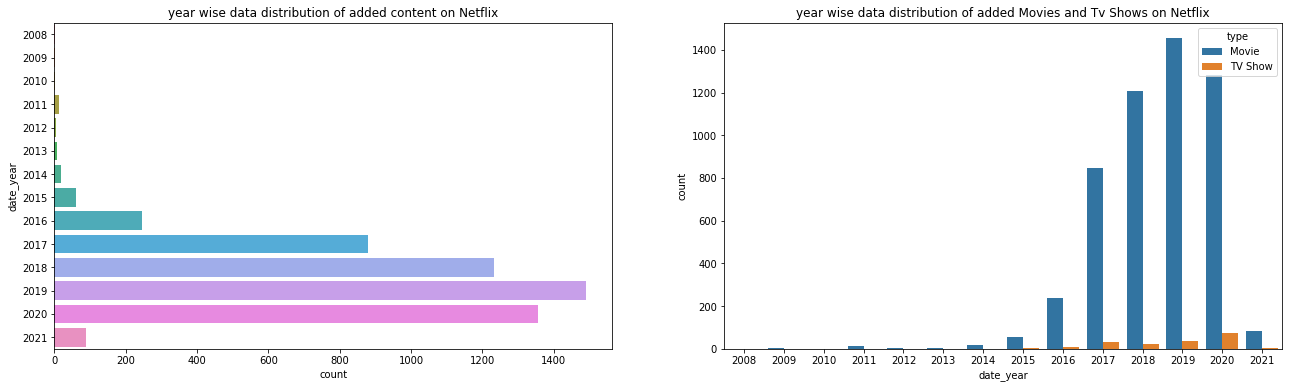

In [ ]:
#figured some graphs
fig,axs = plt.subplots(1,2 ,figsize=(22,6))
# This graph represent the year wise number of Content added on netflix 
sns.countplot(y="date_year",ax=axs[0], data=df).set(title='year wise data distribution of added content on Netflix')
# This graph represent the yearly data distribution of added Movies and Tv shows on Netflix  
sns.countplot(x="date_year",hue='type',ax=axs[1], data=df).set(title='year wise data distribution of added Movies and Tv Shows on Netflix')
plt.show()

In [ ]:
#drop nan values
df = df.dropna()

#**WordCloud**

In [ ]:
from wordcloud import WordCloud, STOPWORDS

##**Word Cloud for Countries**

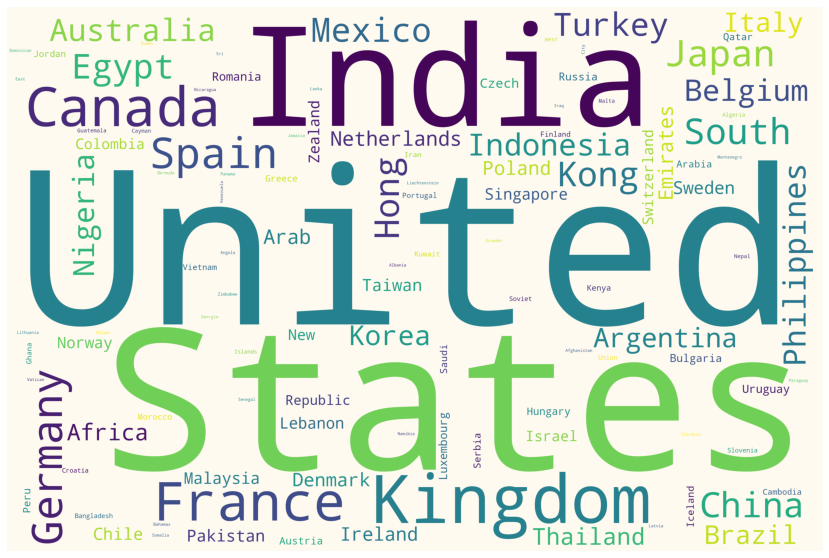

In [ ]:
#Creating the text variable
text = " ".join(country for country in df.country)

# Creating word_cloud with text as argument in .generate() method
plt.subplots(figsize=(20,10))
word_cloud = WordCloud(width=3000,height=2000,collocations = False, background_color = 'floralwhite').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

##**Word Cloud for Title**

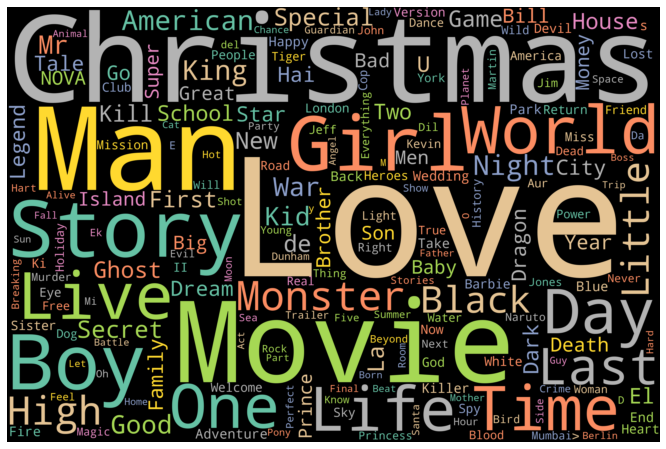

In [ ]:

plt.subplots(figsize=(20,8))
#Creating the text variable
text = " ".join(title for title in df.title)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width=3000,height=2000,random_state=1,collocations = False, background_color = 'black',colormap='Set2').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##**Word Cloud for cast**

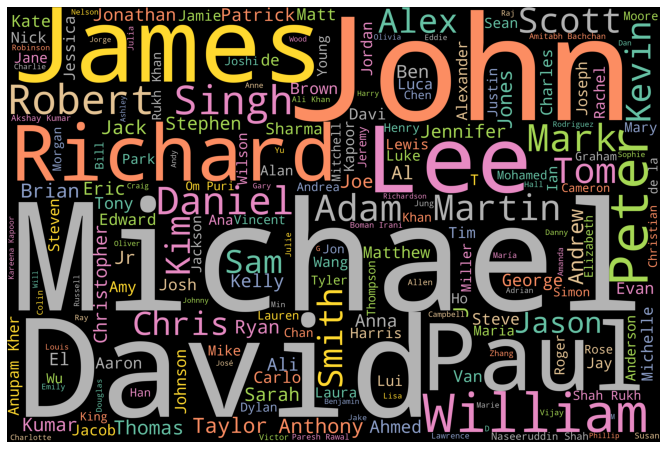

In [ ]:
#Creating the text variable
text = " ".join(cast for cast in df.cast)

# Creating word_cloud with text as argument in .generate() method
plt.subplots(figsize=(20,8))
word_cloud = WordCloud(width=3000,height=2000, background_color = 'black',colormap='Set2').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

##**Word Cloud for Categories**

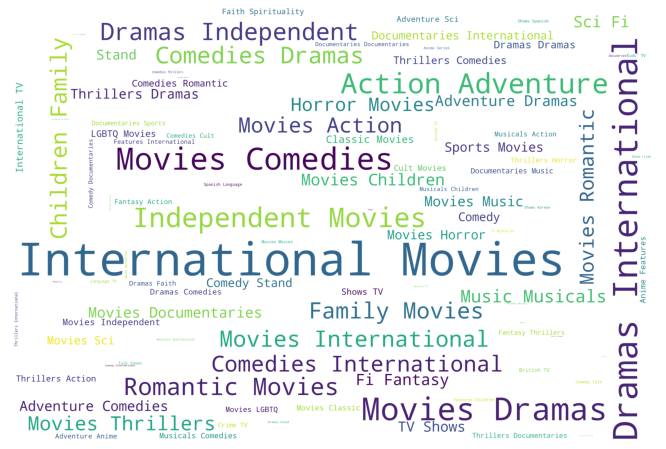

In [ ]:
plt.subplots(figsize=(20,8))
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width=3000,height=2000, background_color = 'white').generate(" ".join(i for i in df.listed_in))

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

##**Word Cloud for description**

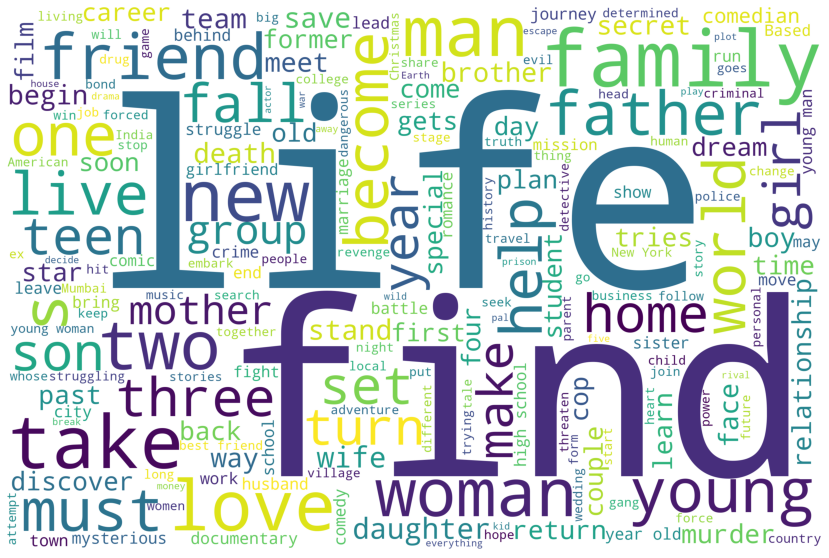

In [ ]:
#Creating the text variable
text = " ".join(df.description)
#Create StopWOrd
stopwords = set(STOPWORDS)

# Creating word_cloud with text as argument in .generate() method
plt.subplots(figsize=(20,10))
word_cloud = WordCloud(width=3000,height=2000, background_color = 'white',stopwords=STOPWORDS).generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

delet unnecessary column 
1.) show id, 2.)title 3.) date_added , 4.) duration 

In [ ]:
#dropping unnecessary columns
netflix_df.drop(columns = ['show_id','title','date_added','duration'],inplace=True)

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   director      5398 non-null   object
 2   cast          7069 non-null   object
 3   country       7280 non-null   object
 4   release_year  7787 non-null   int64 
 5   rating        7780 non-null   object
 6   listed_in     7787 non-null   object
 7   description   7787 non-null   object
dtypes: int64(1), object(7)
memory usage: 486.8+ KB


In [ ]:
#data preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans